In [9]:
from matplotlib import pyplot as plt
import pandas as pd
import os

path = 'results/reeval_sparsity_problem_resnet18_imagenet_2023-01-27_12-37.csv'
path2 = 'results/reeval_sparsity_problem_resnet18_imagenet_2023-01-27_21-09-11.csv'

df = pd.read_csv(os.path.join('..', path))
df2 = pd.read_csv(os.path.join('..', path2))



In [10]:
df['deviation'] = df['accuracy'] - df['acc_full']
df['F_0'] = -df['F_0'] * 100_000_000 / 4096
df2['deviation'] = df2['accuracy'] - df2['acc_full']
df2['F_0'] = -df2['F_0'] * 100_000_000 / 1024

<AxesSubplot: xlabel='acc_full', ylabel='F_0'>

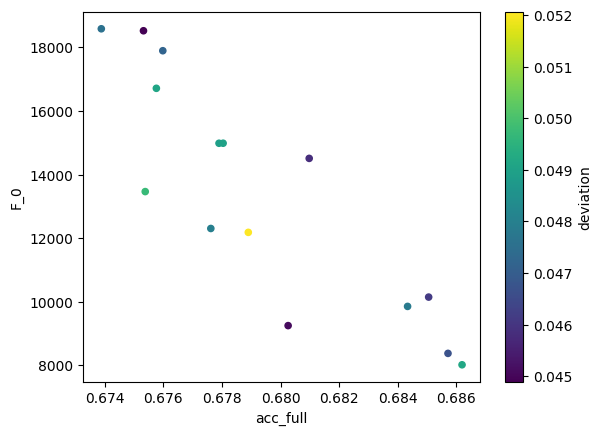

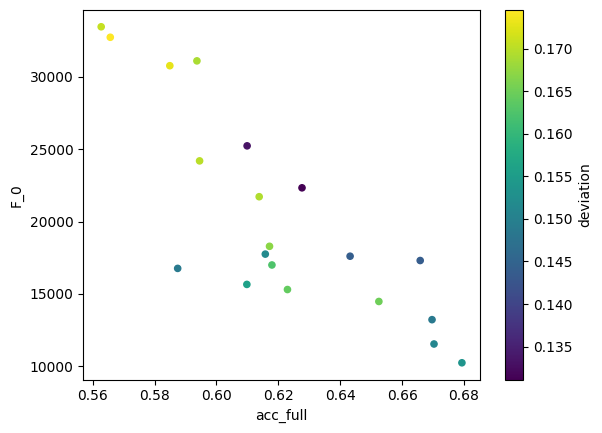

In [11]:
df.plot(y='F_0', x='acc_full', c='deviation', colormap='viridis', kind='scatter')
df2.plot(y='F_0', x='acc_full', c='deviation', colormap='viridis', kind='scatter')

In [22]:
df_sort = df.sort_values(by=['accuracy', 'deviation'])
df_sort[df_sort.columns.difference(['bits'])].head(n=15)

,Unnamed: 0,acc_full,accuracy,cost,crossover_eta,crossover_prob,deviation,generation,individual,mutation_eta,mutation_prob,selection_press,weighted_bits
90,90,0.6679,0.752928,0.176610,30,0.9,0.085028,23,19,50,0.9,2,926.5
89,89,0.6674,0.753416,0.176526,5,0.9,0.086016,23,17,10,0.9,2,935.5
95,95,0.6721,0.754392,0.179849,30,0.9,0.082292,15,9,10,0.9,2,959.5
39,39,0.6683,0.754636,0.144031,30,0.9,0.086336,24,15,50,0.9,2,902.5
73,73,0.6691,0.754758,0.164807,30,0.9,0.085658,15,12,50,0.9,2,940.5
72,72,0.6687,0.755002,0.164765,15,0.9,0.086302,15,15,100,0.9,2,945.0
82,82,0.6680,0.755002,0.172037,30,0.9,0.087002,15,11,50,0.9,2,957.5
76,76,0.6693,0.755246,0.169377,30,0.9,0.085946,24,9,30,0.9,2,957.5
71,71,0.6674,0.755368,0.164266,30,0.9,0.087968,18,11,50,0.9,2,951.0
66,66,0.6696,0.755490,0.159737,5,0.9,0.085890,23,8,10,0.9,2,945.5


<AxesSubplot: xlabel='acc_full', ylabel='weighted_bits'>

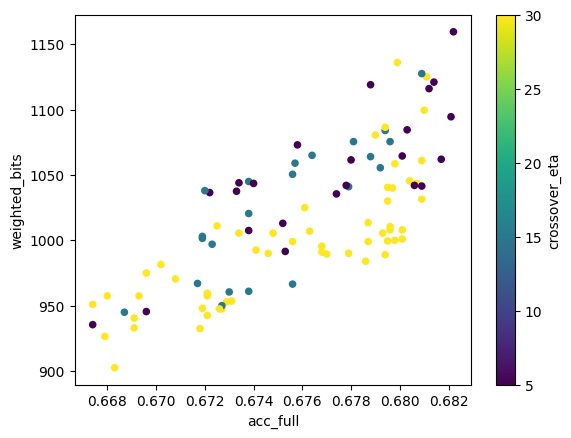

In [32]:
df.plot(x='acc_full', y='weighted_bits', c='crossover_eta', colormap='viridis', kind='scatter')

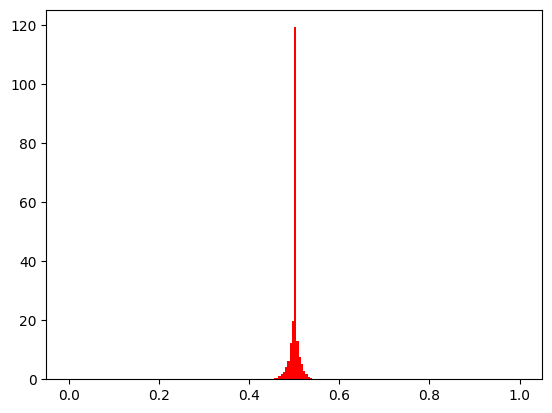

In [22]:
import matplotlib.pyplot as plt
import numpy as np

from pymoo.core.population import Population
from pymoo.core.problem import Problem
from pymoo.operators.mutation.pm import PolynomialMutation
from pymoo.operators.mutation.gauss import GaussianMutation


def show(eta_mut):
    problem = Problem(n_var=1, xl=0.0, xu=1.0)

    X = np.full((5000, 1), 0.5)
    pop = Population.new(X=X)

    mutation = PolynomialMutation(prob=1.0, eta=eta_mut)
    # mutation = GaussianMutation(sigma=eta_mut)

    off = mutation(problem, pop)
    Xp = off.get("X")

    plt.hist(Xp, range=(0.0, 1.0), bins=200, density=True, color="red")
    plt.show()

show(100.0)